## **Atp 2024 season analysis**


In [1]:
# Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
##reading the data
df = pd.read_csv('atp_matches_2024.csv') ## main dataset
df2 = pd.read_csv('atp_rankings_current.csv') ## secondary dataset to get players id as i thought i would need it
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2024-0339,Brisbane,Hard,32,A,20240101,300,105777,2.0,NaN,...,58.0,44.0,16.0,11.0,8.0,9.0,14.0,2570.0,8.0,3660.0
1,2024-0339,Brisbane,Hard,32,A,20240101,299,208029,1.0,NaN,...,35.0,31.0,10.0,11.0,5.0,7.0,8.0,3660.0,39.0,1122.0
2,2024-0339,Brisbane,Hard,32,A,20240101,298,105777,2.0,NaN,...,39.0,24.0,14.0,10.0,5.0,7.0,14.0,2570.0,55.0,902.0
3,2024-0339,Brisbane,Hard,32,A,20240101,297,208029,1.0,NaN,...,51.0,31.0,16.0,10.0,3.0,5.0,8.0,3660.0,116.0,573.0
4,2024-0339,Brisbane,Hard,32,A,20240101,296,126128,NaN,NaN,...,37.0,27.0,16.0,10.0,5.0,8.0,39.0,1122.0,44.0,1021.0


In [3]:
# checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3076 non-null   object 
 1   tourney_name        3076 non-null   object 
 2   surface             3076 non-null   object 
 3   draw_size           3076 non-null   int64  
 4   tourney_level       3076 non-null   object 
 5   tourney_date        3076 non-null   int64  
 6   match_num           3076 non-null   int64  
 7   winner_id           3076 non-null   int64  
 8   winner_seed         1294 non-null   float64
 9   winner_entry        477 non-null    object 
 10  winner_name         3076 non-null   object 
 11  winner_hand         3076 non-null   object 
 12  winner_ht           3057 non-null   float64
 13  winner_ioc          3076 non-null   object 
 14  winner_age          3075 non-null   float64
 15  loser_id            3076 non-null   int64  
 16  loser_

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92341 entries, 0 to 92340
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ranking_date  92341 non-null  int64
 1   rank          92341 non-null  int64
 2   player        92341 non-null  int64
 3   points        92341 non-null  int64
dtypes: int64(4)
memory usage: 2.8 MB


In [5]:
Data_ = df.copy() ## creating a copy from the original data

# Cleaning the data

In [6]:
Data_.info() ## checking non null info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3076 non-null   object 
 1   tourney_name        3076 non-null   object 
 2   surface             3076 non-null   object 
 3   draw_size           3076 non-null   int64  
 4   tourney_level       3076 non-null   object 
 5   tourney_date        3076 non-null   int64  
 6   match_num           3076 non-null   int64  
 7   winner_id           3076 non-null   int64  
 8   winner_seed         1294 non-null   float64
 9   winner_entry        477 non-null    object 
 10  winner_name         3076 non-null   object 
 11  winner_hand         3076 non-null   object 
 12  winner_ht           3057 non-null   float64
 13  winner_ioc          3076 non-null   object 
 14  winner_age          3075 non-null   float64
 15  loser_id            3076 non-null   int64  
 16  loser_

In [7]:
##droping useless columns that will not be used 
Data_ = Data_.drop(columns=['match_num','draw_size','winner_seed','winner_entry','winner_hand','winner_ht',
                           'loser_seed','loser_entry','loser_hand','loser_ht'])

In [8]:
Data_.info() ## making sure that i dropped the correct columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3076 entries, 0 to 3075
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          3076 non-null   object 
 1   tourney_name        3076 non-null   object 
 2   surface             3076 non-null   object 
 3   tourney_level       3076 non-null   object 
 4   tourney_date        3076 non-null   int64  
 5   winner_id           3076 non-null   int64  
 6   winner_name         3076 non-null   object 
 7   winner_ioc          3076 non-null   object 
 8   winner_age          3075 non-null   float64
 9   loser_id            3076 non-null   int64  
 10  loser_name          3076 non-null   object 
 11  loser_ioc           3076 non-null   object 
 12  loser_age           3075 non-null   float64
 13  score               3076 non-null   object 
 14  best_of             3076 non-null   int64  
 15  round               3076 non-null   object 
 16  minute

In [9]:
##checking the nan data 
Data_.loc[Data_['w_df'].isna()]

,tourney_id,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_name,winner_ioc,winner_age,loser_id,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
12,2024-0339,Brisbane,Hard,A,20240101,111442,Jordan Thompson,AUS,29.7,200005,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,902.0,20.0,1765.0
116,2024-0301,Auckland,Hard,A,20240108,126214,Alejandro Tabilo,CHI,26.6,111815,...,NaN,NaN,NaN,NaN,NaN,NaN,82.0,707.0,19.0,1810.0
327,2024-0424,Dallas,Hard,A,20240205,105173,Adrian Mannarino,FRA,35.6,106415,...,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1920.0,83.0,695.0
677,2024-0404,Indian Wells Masters,Hard,M,20240304,208029,Holger Rune,DEN,20.8,105683,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,3720.0,224.0,275.0
978,2024-0425,Barcelona,Clay,A,20240415,200221,Alejandro Davidovich Fokina,ESP,24.8,207830,...,NaN,NaN,NaN,NaN,NaN,NaN,27.0,1395.0,50.0,988.0
1061,2024-1536,Madrid Masters,Clay,M,20240422,200000,Felix Auger Aliassime,CAN,23.7,206173,...,NaN,NaN,NaN,NaN,NaN,NaN,35.0,1240.0,2.0,8660.0
1259,2024-0322,Geneva,Clay,A,20240520,207686,Alexander Shevchenko,KAZ,23.4,200325,...,NaN,NaN,NaN,NaN,NaN,NaN,61.0,825.0,66.0,768.0
1279,2024-7694,Lyon,Clay,A,20240520,209260,Luciano Darderi,ITA,22.2,126239,...,NaN,NaN,NaN,NaN,NaN,NaN,47.0,1002.0,73.0,739.0
1286,2024-7694,Lyon,Clay,A,20240520,208659,Giovanni Mpetshi Perricard,FRA,20.8,106415,...,NaN,NaN,NaN,NaN,NaN,NaN,117.0,541.0,72.0,741.0
1305,2024-520,Roland Garros,Clay,G,20240527,134770,Casper Ruud,NOR,25.4,104925,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,4425.0,1.0,9960.0


In [10]:
##decided to drop the nan since i cannot assume numbers for games already played but its data is lost
serve_cols = ['w_ace', 'l_ace', 'w_df', 'l_df']
Data_ = Data_.dropna(subset=serve_cols)


In [11]:
Data_.isna().sum()

tourney_id              0
tourney_name            0
surface                 0
tourney_level           0
tourney_date            0
winner_id               0
winner_name             0
winner_ioc              0
winner_age              1
loser_id                0
loser_name              0
loser_ioc               0
loser_age               1
score                   0
best_of                 0
round                   0
minutes               189
w_ace                   0
w_df                    0
w_svpt                  0
w_1stIn                 0
w_1stWon                0
w_2ndWon                0
w_SvGms                 1
w_bpSaved               0
w_bpFaced               0
l_ace                   0
l_df                    0
l_svpt                  0
l_1stIn                 0
l_1stWon                0
l_2ndWon                0
l_SvGms                 1
l_bpSaved               0
l_bpFaced               0
winner_rank            17
winner_rank_points     17
loser_rank             38
loser_rank_p

# Matches analysis

i begin by visulizating the match surface distribution by surface because there are different type of courts 

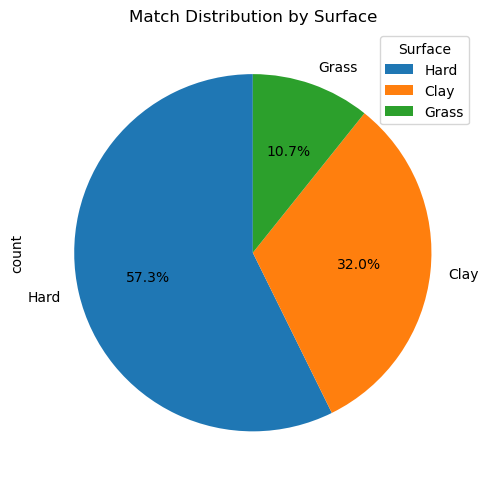

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5)) ## assign figure and its size

Data_['surface'].value_counts().plot(
    kind='pie', # type of visulization
    autopct='%1.1f%%',      # show percentages
    startangle=90         # better orientation
)
ax.set_title('Match Distribution by Surface')##setting title
plt.legend(
    title='Surface',
    loc='best' # location of the legend
)## box shown on the top right
plt.tight_layout()
plt.show()

In [13]:
# average time for matches for the whole season
avg_time= df['minutes'].mean()
print(f'Average time for matches for the whole season across all tournments is {int(avg_time)}.')


Average time for matches for the whole season across all tournments is 115.


identifying the different tournments levels because the time differes 

In [ ]:
## creating a dictionary that carries the different attributes. i could use dataframe but this is the first idea that came in my mind
types = {
    'Masters<=500': int(Data_.loc[Data_['tourney_level'] == 'A', 'minutes'].mean()), 
    'Masters_1000': int(Data_.loc[Data_['tourney_level'] == 'M', 'minutes'].mean()),
    'Grand_slam': int(Data_.loc[Data_['tourney_level'] == 'G', 'minutes'].mean()),
    'Davis_cup': int(Data_.loc[Data_['tourney_level'] == 'D', 'minutes'].mean()),
    # 'O': Data_.loc[Data_['tourney_level'] == 'O', 'minutes'].mean(),
    'Tour_finals': int(Data_.loc[Data_['tourney_level'] == 'F', 'minutes'].mean()),
}

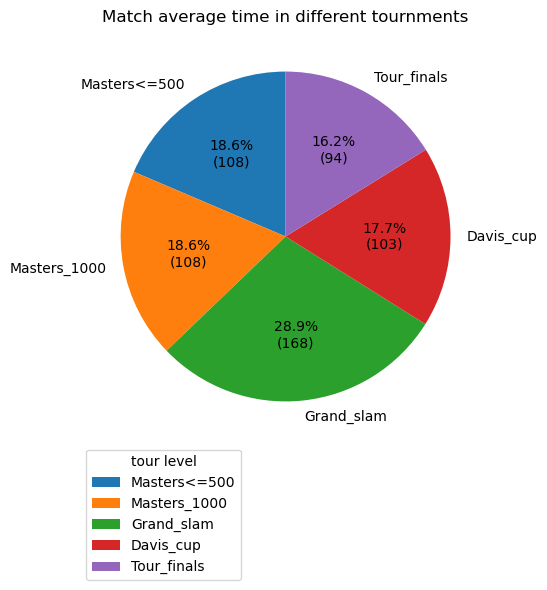

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6)) ## intializing the figure size 
ax.pie(
    types.values(),
    labels = types.keys(),
    autopct=lambda p: f'{p:.1f}%\n({p*sum(types.values())/100:.0f})',# show percentages using lambda method "googled it"
    startangle=90         # better orientation
)## here i used ax because i am displaying the data from dictionary not the dataframe
ax.set_title('Match average time in different tournments')
plt.legend(
    title='tour level',
    loc='upper left', # location of the legend
    bbox_to_anchor=(0, 0),# location of the legend
)
plt.tight_layout()
plt.show()

I was thinking about using bar plot but i chose the piechart much better

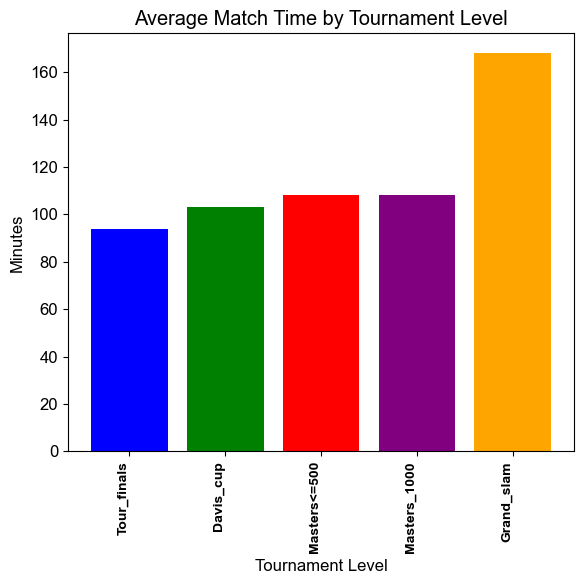

In [ ]:
types_sorted = dict(sorted(types.items(), key=lambda x: x[1])) ## sorting the keys for dictionary using lambda method
colors = ['blue', 'green', 'red', 'purple', 'orange'] # choosing the colors for the displays 
fig, ax = plt.subplots(figsize=(6, 6)) # intializing the figure size

ax.bar(
    types_sorted.keys(),
    types_sorted.values(),
    color=colors
) 
ax.set_title('Average Match Time by Tournament Level') ## setting the title
ax.set_ylabel('Minutes')
ax.set_xlabel('Tournament Level')
plt.xticks(rotation=90, ha='right',fontsize=10,fontweight='bold') #fixing the gaps between the bars for better attirbute visualization
plt.tight_layout()
plt.show()


# Top 10 players analysis

starting by serves,aces and double faults

In [ ]:
#Since the dataset is really large and i want to analyze only the top 10 players so i started to think how can get the top 10 players of the world from the 6000 record
#also the dataset has the records for the matches and sometimes the player  wins and sometimes player loses so there is no unique value to collect their data insantly
#so i used concact to combaine their data and took the attributes that i needed such as 
#tournment level,surface,firstservewon,firstservein,secondservewon,aces,doublefaults,servepoints and renamed them
serve_df = pd.concat([
    Data_[['tourney_level','tourney_name','surface','winner_name', 'winner_rank', 'w_1stWon', 'w_1stIn','w_2ndWon','w_ace','w_svpt','w_df']]
        .rename(columns={
            'winner_name': 'player',
            'winner_rank': 'rank',
            'w_1stWon': 'first_won',
            'w_1stIn': 'first_in',
            'w_2ndWon': 'second_won',
            'w_ace':'aces',
            'w_svpt':'svpts',
            'w_df':'dfault'
        }),
    Data_[['tourney_level', 'tourney_name','surface','loser_name', 'loser_rank', 'l_1stWon', 'l_1stIn','l_2ndWon','l_ace','l_svpt','l_df']]
        .rename(columns={
            'loser_name': 'player',
            'loser_rank': 'rank',
            'l_1stWon': 'first_won',
            'l_1stIn': 'first_in',
            'l_2ndWon':'second_won',
            'l_ace':'aces',
            'l_svpt':'svpts',
            'l_df':'dfault'
        })
], ignore_index=True)


In [ ]:
top10_players = (
    serve_df #dataframe
    .groupby('player')['rank'] #groupby the rank as it's the coniditon needed
    .min()#minimum value because the highest is 1->2->3
    .sort_values()
    .head(10)#keep only players till 10
    .index # extract the index
) # created a query 

serve_df = serve_df[serve_df['player'].isin(top10_players)] # update the dataframe
serve_df

,tourney_level,tourney_name,surface,player,rank,first_won,first_in,second_won,aces,svpts,dfault
30,A,United Cup,Hard,Alexander Zverev,7.0,62.0,72.0,14.0,8.0,96.0,1.0
31,A,United Cup,Hard,Hubert Hurkacz,9.0,31.0,36.0,14.0,15.0,58.0,0.0
33,A,United Cup,Hard,Hubert Hurkacz,9.0,36.0,48.0,9.0,10.0,65.0,0.0
34,A,United Cup,Hard,Casper Ruud,11.0,29.0,33.0,9.0,10.0,50.0,1.0
36,A,United Cup,Hard,Alexander Zverev,7.0,34.0,45.0,8.0,5.0,56.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5790,F,Tour Finals,Hard,Casper Ruud,7.0,33.0,45.0,7.0,3.0,56.0,0.0
5791,F,Tour Finals,Hard,Andrey Rublev,8.0,26.0,34.0,8.0,3.0,49.0,0.0
5792,F,Tour Finals,Hard,Carlos Alcaraz,3.0,17.0,29.0,8.0,4.0,44.0,2.0
5793,F,Tour Finals,Hard,Andrey Rublev,8.0,40.0,53.0,12.0,7.0,76.0,1.0


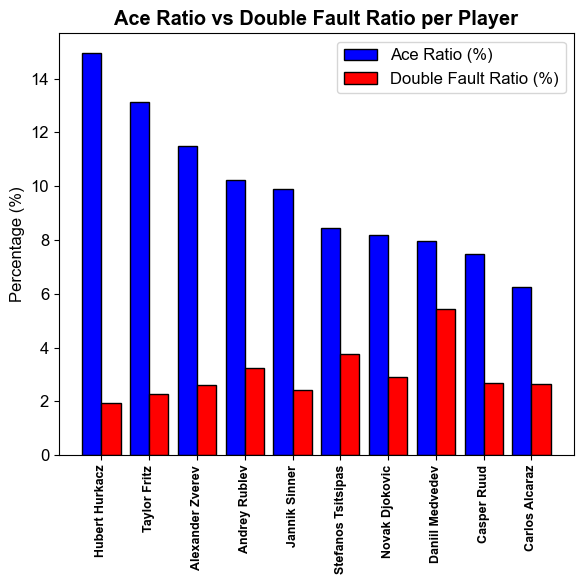

In [ ]:
## a function to calculate aces vs double faults per player
def aces_vs_faults_ratio_per_player(df):
    # i assigned 4 empty lists
    players = []
    aces = []
    dfaults = []
    sevpts = []

    # collect the stats for each list
    for player, s in df.groupby("player"): # loop over players 
        players.append(player)
        aces.append(s["aces"].sum())
        dfaults.append(s["dfault"].sum())
        sevpts.append(s["svpts"].sum())

    # combine the lists into dataframe
    stats = pd.DataFrame({
        "player": players,
        "aces": aces,
        "dfault": dfaults,
        "svpts": sevpts
    })

    # ratios
    stats["ace_ratio"] = (stats["aces"] / stats["svpts"]) * 100 #aces/servepoints * 100
    stats["dfault_ratio"] = (stats["dfault"] / stats["svpts"]) * 100#faults/servepoints * 100

    # sort players by ace ratio
    stats = stats.sort_values("ace_ratio", ascending=False).head(10)

    # X locations googled on how to do it
    x = np.arange(len(stats))
    bar_width = 0.4

    plt.figure(figsize=(6, 6)) ## intializing the figure size

    # plotting the bars
    plt.bar(
        x - bar_width/2,
        stats["ace_ratio"],
        width=bar_width,
        color="blue",
        edgecolor="black",
        label="Ace Ratio (%)"
    )

    plt.bar(
        x + bar_width/2,
        stats["dfault_ratio"],
        width=bar_width,
        color="red",
        edgecolor="black",
        label="Double Fault Ratio (%)"
    )

    # Labels
    plt.xticks(x, stats["player"], rotation=90, fontsize=9,fontweight='bold') 
    plt.ylabel("Percentage (%)")
    plt.title("Ace Ratio vs Double Fault Ratio per Player", fontweight="bold")
    plt.legend()

    plt.tight_layout()
    plt.show()
aces_vs_faults_ratio_per_player(serve_df)


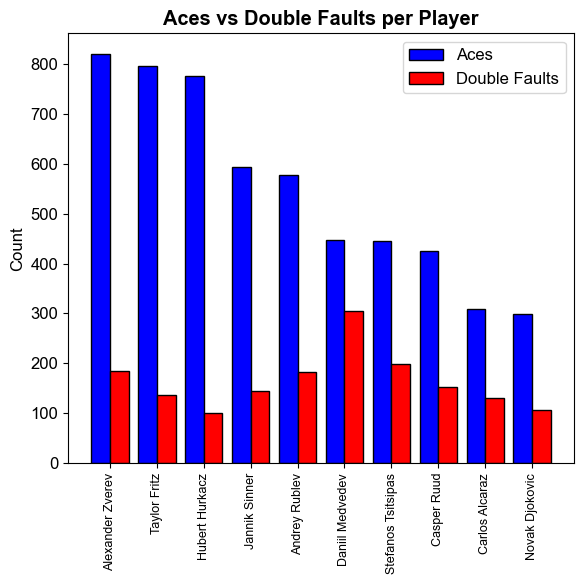

In [ ]:
#the same function as above but without the ratio just displaying aces vs doublefaults with the total points
def aces_vs_faults_per_player(df):

    players = []
    aces = []
    dfaults = []

    
    for player, s in df.groupby("player"):
        players.append(player)
        aces.append(s["aces"].sum())
        dfaults.append(s["dfault"].sum())

    stats = pd.DataFrame({
        "player": players,
        "aces": aces,
        "dfault": dfaults
    })

    
    stats = stats.sort_values("aces", ascending=False).head(10)

    
    x = np.arange(len(stats))
    bar_width = 0.4

    plt.figure(figsize=(6, 6))

    
    plt.bar(
        x - bar_width/2,
        stats["aces"],
        width=bar_width,
        color="blue",
        edgecolor="black",
        label="Aces"
    )

    
    plt.bar(
        x + bar_width/2,
        stats["dfault"],
        width=bar_width,
        color="red",
        edgecolor="black",
        label="Double Faults"
    )

    
    plt.xticks(x, stats["player"], rotation=90, fontsize=9)
    plt.ylabel("Count")
    plt.title("Aces vs Double Faults per Player", fontweight="bold")
    plt.legend()

    plt.tight_layout()
    plt.show()
aces_vs_faults_per_player(serve_df)

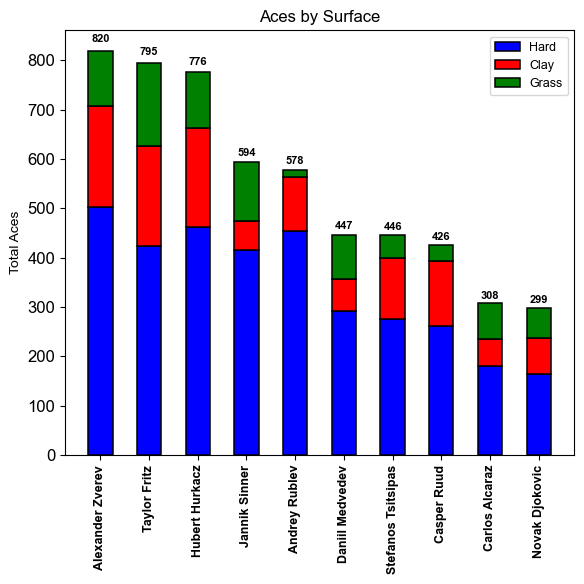

In [ ]:
#function to show the most aces was done on which surface
def stacked_aces_by_surface_per_player(df):
    # same logic of the above functions was used but with different calculations
    players = []
    hard_aces = []
    clay_aces = []
    grass_aces = []

    # collect aces per surface for each player
    for player, g in df.groupby("player"):
        players.append(player)
        hard_aces.append(g[g["surface"] == "Hard"]["aces"].sum()) #filtering surface that is hard and getting the aces sum
        clay_aces.append(g[g["surface"] == "Clay"]["aces"].sum()) #filtering surface that is clay and getting the aces sum
        grass_aces.append(g[g["surface"] == "Grass"]["aces"].sum())#filtering surface that is grass and getting the aces sum

    #creating dataframe
    stats = pd.DataFrame({
        "player": players,
        "Hard": hard_aces,
        "Clay": clay_aces,
        "Grass": grass_aces
    })

    # sort by total aces
    stats["total"] = stats["Hard"] + stats["Clay"] + stats["Grass"]
    stats = stats.sort_values("total", ascending=False).head(12)

    # Bars closer together
    x = np.arange(len(stats)) * 0.7
    bar_width = 0.35

    plt.figure(figsize=(6, 6)) 

    # Stacking the bars above each other
    plt.bar(
        x, stats["Hard"],
        width=bar_width,
        color="blue",
        edgecolor="black",
        linewidth=1.1,
        label="Hard"
    )

    plt.bar(
        x, stats["Clay"],
        bottom=stats["Hard"],
        width=bar_width,
        color="red",
        edgecolor="black",
        linewidth=1.1,
        label="Clay"
    )

    plt.bar(
        x, stats["Grass"],
        bottom=stats["Hard"] + stats["Clay"],
        width=bar_width,
        color="green",
        edgecolor="black",
        linewidth=1.1,
        label="Grass"
    )

    # Labels on top
    for i in range(len(stats)):
        total = stats["total"].iloc[i]
        plt.text(
            x[i],
            total + total * 0.015,
            str(int(total)),
            ha="center",
            va="bottom",
            fontsize=8,
            fontweight="bold"
        )

    plt.xticks(x, stats["player"], rotation=90, fontsize=9,fontweight='bold')
    plt.ylabel("Total Aces", fontsize=10)
    plt.title("Aces by Surface", fontsize=12)

    plt.legend(fontsize=9)
    plt.tight_layout()
    plt.show()
stacked_aces_by_surface_per_player(serve_df)

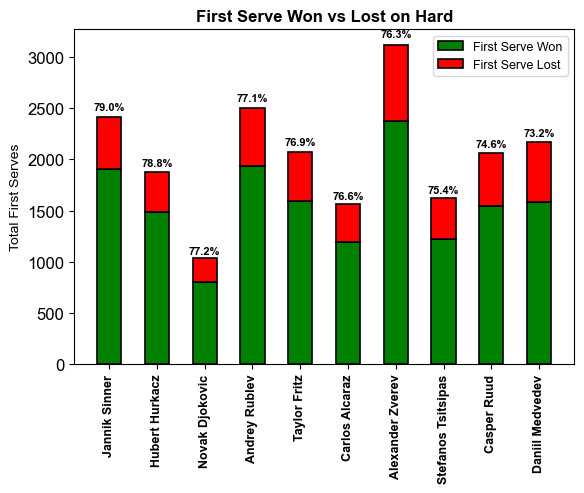

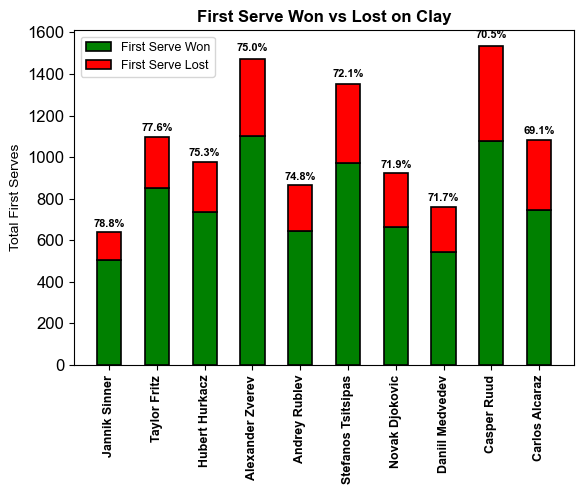

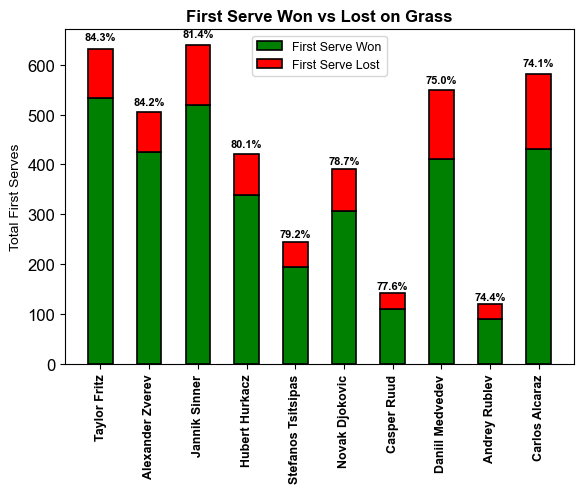

In [196]:
# displaying first serve won when was in vs lost in each surface 
surf = ['Hard', 'Clay', 'Grass'] # list of surfaces
def stacked_first_serve_each_surface(df):

    for s in surf: # looping on the surfaces

        sub = df[df["surface"] == s]

        players = []
        first_in_list = []
        first_won_list = []
        first_lost_list = []

        # collecting data for the list 
        for player, g in sub.groupby("player"):
            first_in  = g["first_in"].sum()
            first_won = g["first_won"].sum()
            first_lost = first_in - first_won ##calculating serves that are lost

            players.append(player) 
            first_in_list.append(first_in)
            first_won_list.append(first_won)
            first_lost_list.append(first_lost)

        # build dataframe
        stats = pd.DataFrame({
            "player": players,
            "first_in": first_in_list,
            "first_won": first_won_list,
            "first_lost": first_lost_list
        })

        # calculating win percentage
        stats["pct"] = stats["first_won"] / stats["first_in"].replace(0, 1) * 100 # avoid any zeros so i used replace with 1 

        # sort by percentage
        stats = stats.sort_values("pct", ascending=False).head(10)

        # slim bars and spacing
        x = np.arange(len(stats)) * 0.75
        bar_width = 0.38

        plt.figure(figsize=(6, 6))

        
        # pts won at bottom
        plt.bar(
            x,
            stats["first_won"],
            width=bar_width,
            color='green',
            edgecolor="black",
            linewidth=1.2,
            label="First Serve Won"
        )

        # pts lost on top
        plt.bar(
            x,
            stats["first_lost"],
            bottom=stats["first_won"],
            width=bar_width,
            color='red',
            edgecolor="black",
            linewidth=1.2,
            label="First Serve Lost"
        )

        # winning perc labels on top of bars
        for i in range(len(stats)):
            total_height = stats["first_in"].iloc[i]
            pct = stats["pct"].iloc[i]

            plt.text(
                x[i],
                total_height + total_height * 0.02,
                f"{pct:.1f}%",
                ha="center",
                va="bottom",
                fontsize=8,
                fontweight="bold"
            )

        # xlabels
        plt.xticks(x, stats["player"], rotation=90, fontsize=9)
        for label in plt.gca().get_xticklabels():
            label.set_fontweight("bold")

        plt.ylabel("Total First Serves", fontsize=10)
        plt.title(f"First Serve Won vs Lost on {s}", fontsize=12, fontweight="bold")

        plt.legend(fontsize=9)
        plt.tight_layout(rect=[0, 0.15, 1, 1])
        plt.show()
stacked_first_serve_each_surface(serve_df)

# Break points statistics

In [ ]:
## doing the same logic i did for the serve,ace,doublefault step
bp_df = pd.concat([
    Data_[['tourney_level','tourney_name','surface','winner_name', 'winner_rank','w_bpSaved','w_bpFaced' ]]
        .rename(columns={
            'winner_name':'player',
            'w_bpSaved':'bpSaved',
            'w_bpFaced':'bpFaced',
            'winner_rank': 'rank'
        }),
    Data_[['tourney_level', 'tourney_name','surface','loser_name', 'loser_rank','l_bpSaved','l_bpFaced']]
        .rename(columns={
            'loser_name':'player',
            'l_bpSaved':'bpSaved',
            'l_bpFaced':'bpFaced',
            'loser_rank':'rank'
        })
], ignore_index=True)


In [ ]:
# same query to get the top 10 ranked players
top10_players = (
    bp_df
    .groupby('player')['rank']
    .min()
    .sort_values()
    .head(10)
    .index
)

bp_df = bp_df[bp_df['player'].isin(top10_players)]
bp_df.head()

,tourney_level,tourney_name,surface,player,rank,bpSaved,bpFaced
30,A,United Cup,Hard,Alexander Zverev,7.0,0.0,0.0
31,A,United Cup,Hard,Hubert Hurkacz,9.0,0.0,0.0
33,A,United Cup,Hard,Hubert Hurkacz,9.0,1.0,1.0
34,A,United Cup,Hard,Casper Ruud,11.0,0.0,0.0
36,A,United Cup,Hard,Alexander Zverev,7.0,2.0,2.0


In [188]:
#function to calculate break points won and lost 
def calc_bp_all(df):
    # same logic above
    players = []
    bp_saved_list = []
    bp_lost_list = []
    bp_faced_list = []

    # loop over dataframe grouped by player
    for player, g in df.groupby("player"):
        bp_saved = g["bpSaved"].sum() #get the sum of saved points
        bp_faced = g["bpFaced"].sum() #get the sum of faced points
        bp_lost = bp_faced - bp_saved

        if bp_faced == 0:
            continue

        players.append(player)
        bp_saved_list.append(bp_saved)
        bp_lost_list.append(bp_lost)
        bp_faced_list.append(bp_faced)

    # build dataframe
    stats = pd.DataFrame({
        "player": players,
        "saved": bp_saved_list,
        "lost": bp_lost_list,
        "faced": bp_faced_list
    })

    # save perc
    stats["pct"] = stats["saved"] / stats["faced"] * 100

    # sort by save perc
    stats = stats.sort_values("pct", ascending=False).head(15)

    # bar positions
    x = np.arange(len(stats)) * 0.75   
    bar_width = 0.38                   

    plt.figure(figsize=(8, 5))

    # saved bar first
    plt.bar(
        x,
        stats["saved"],
        width=bar_width,
        color='green',
        edgecolor="black",
        linewidth=1.2,
        label="BP Saved"
    )
    #lost bar second
    plt.bar(
        x,
        stats["lost"],
        bottom=stats["saved"],
        width=bar_width,
        color='red',
        edgecolor="black",
        linewidth=1.2,
        label="BP Lost"
    )

    # percentage labels
    for i in range(len(stats)):
        total = stats["faced"].iloc[i]
        pct = stats["pct"].iloc[i]

        plt.text(
            x[i],
            total + total * 0.02,
            f"{pct:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9,
            fontweight="bold"
        )

    # x labels
    plt.xticks(x, stats["player"], rotation=90, fontsize=10,fontweight='bold')
    plt.ylabel("Break Points Faced")
    plt.title("Break Points Saved vs Lost", fontsize=12, fontweight="bold")

    plt.legend(fontsize=9)
    # plt.tight_layout(rect=[0, 0.15, 1, 1])
    plt.show()


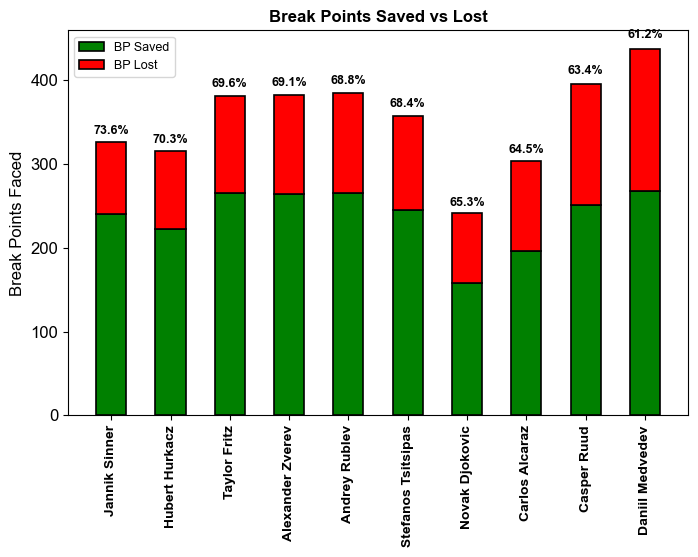

In [189]:
calc_bp_all(bp_df)


# Players winrate

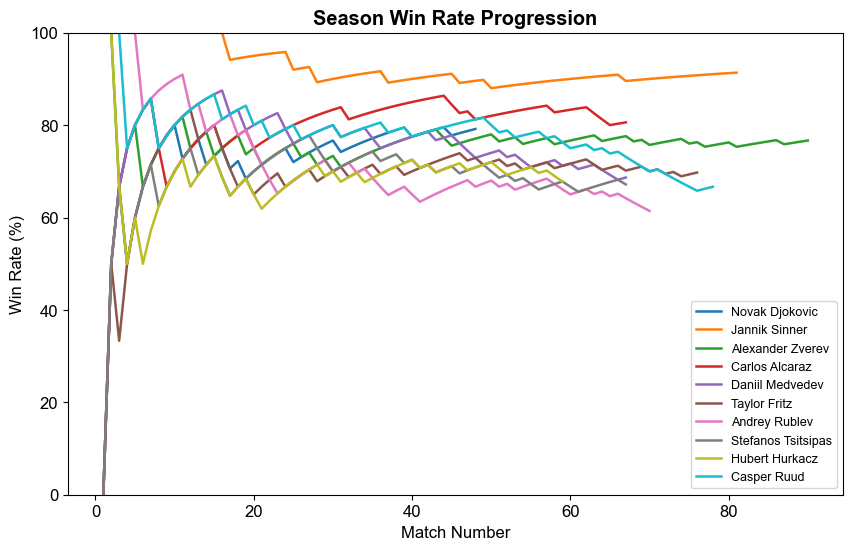

In [ ]:
#displaying players win rate throught the season
matches = Data_ # coping data_

def plot_all_players_winrate(matches, season_df): 
    # using the same logic but in one function 
    winners = matches[["winner_name", "winner_rank"]].rename(
        columns={"winner_name": "player", "winner_rank": "rank"}
    )
    losers = matches[["loser_name", "loser_rank"]].rename(
        columns={"loser_name": "player", "loser_rank": "rank"}
    )

    ranks = pd.concat([winners, losers]).dropna() # dropping null values

    top10 = (
        ranks.groupby("player")["rank"]
        .min()
        .sort_values()
        .head(10)
        .index
    ) # query

    plt.figure(figsize=(10, 6))

    for player in top10:
        p = season_df[season_df["player"] == player].sort_values("tourney_date")

        if len(p) == 0:
            continue

        wins = p["win"].values
        cum_wins = np.cumsum(wins)
        matches_played = np.arange(1, len(p) + 1)
        winrate = cum_wins / matches_played * 100

        plt.plot(
            matches_played,
            winrate,
            linewidth=1.8,
            label=player
        )

    plt.ylim(0, 100)
    plt.xlabel("Match Number")
    plt.ylabel("Win Rate (%)")
    plt.title("Season Win Rate Progression",
              fontweight="bold")

    
    plt.legend(fontsize=9)
  
    plt.show()
plot_all_players_winrate(matches, season_df)
